In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import plotly
import cufflinks as cf
cf.go_offline()

# Covid cases Dataset Inspection

In [136]:
covid = pd.read_csv('owid-covid-data.csv', parse_dates=['date'], index_col=['date'])
covid.sort_index().fillna(method='backfill', inplace=True)

Plot Data for different countries

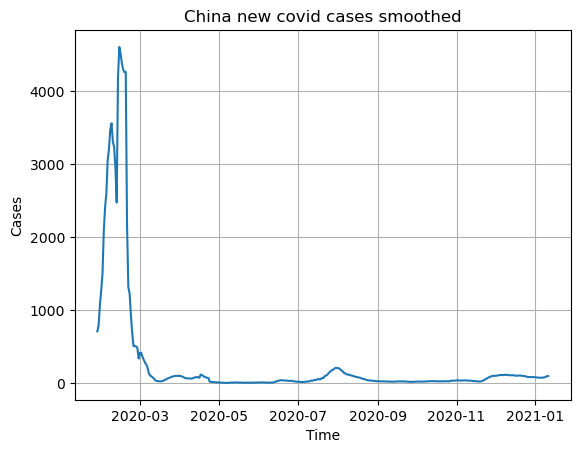

In [139]:
where = 'CHN'
att = 'iso_code'
total = []
for x in covid[covid[att] == where].sort_index().index.unique():
    total.append(covid[covid[att] == where].loc[x]['new_cases_smoothed'].sum())
plt.plot(covid[covid[att] == where].index.unique().sort_values(),total)
plt.ylabel('Cases')
plt.xlabel('Time')
plt.title('China new covid cases smoothed')
plt.grid(True)

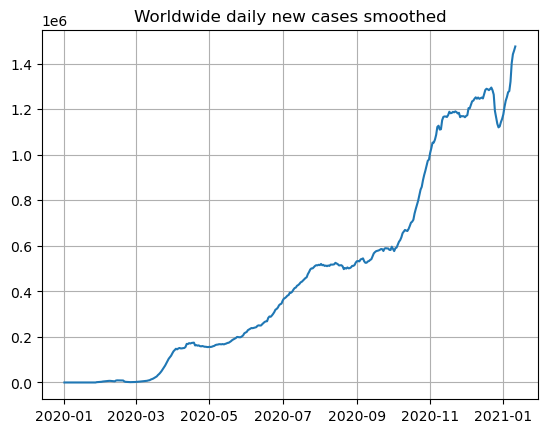

In [87]:
covid = pd.read_csv('owid-covid-data.csv', parse_dates=['date'], index_col=['date'])
#covid.set_index(['location', 'date'], inplace=True)

total = []
for x in covid.index.unique():
    total.append(covid.loc[x]['new_cases_smoothed'].sum())
    
df_covid = pd.DataFrame()
df_covid['date'] = pd.to_datetime(covid.index.unique())
df_covid['cases'] = total

df_covid.sort_values(by='date', inplace=True)
df_covid.set_index('date',inplace=True)
plt.plot(df_covid.cases[:-1])
plt.title('Worldwide daily new cases smoothed')
plt.grid(True)

# Apple stock and S&P500

In [120]:
df = pd.read_csv('AAPL.csv', parse_dates = ['Date'], index_col='Date')
df_SP = pd.read_csv('^GSPC.csv',parse_dates = ['Date'], index_col='Date')

In [92]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

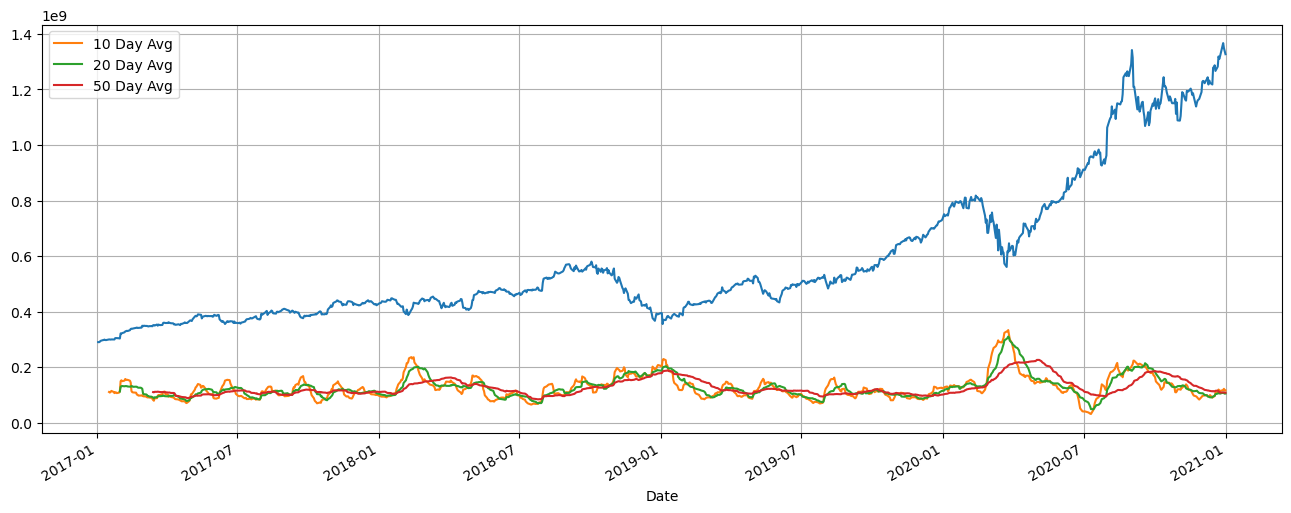

In [10]:
plt.figure(figsize=(16,6))
plt.plot(df.Close*1e7)
df.Volume.rolling(window=10).mean().plot(label='10 Day Avg')
df.Volume.rolling(window=20).mean().plot(label='20 Day Avg')
df.Volume.rolling(window=50).mean().plot(label='50 Day Avg')
plt.grid(True)
plt.legend()

# Divide by year

In [4]:
year = []
for i in range(len(df.index)):
    if '2017' in str(df.index[i]):
        year.append('2017')
    if '2018' in str(df.index[i]):
        year.append('2018')
    if '2019' in str(df.index[i]):
        year.append('2019')
    if '2020' in str(df.index[i]):
        year.append('2020')
        
df['Year'] = year        
df_2017 = df[df.Year == '2017'].reset_index()
df_2018 = df[df.Year == '2018'].reset_index()
df_2019 = df[df.Year == '2019'].reset_index()
df_2020 = df[df.Year == '2020'].reset_index()

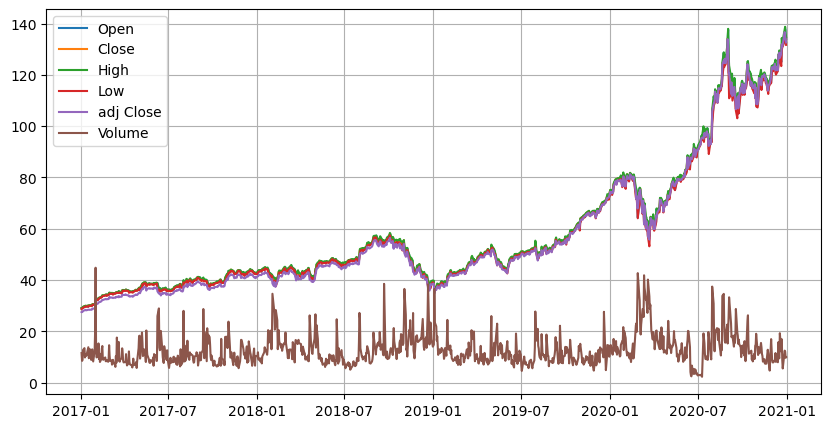

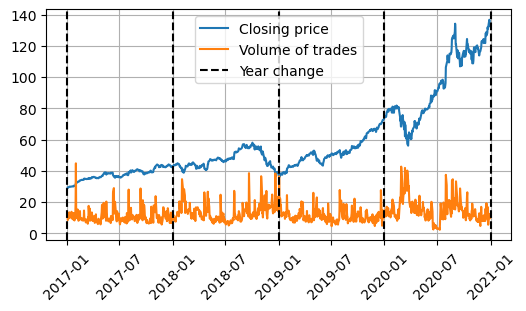

In [140]:
plt.figure(figsize=(10,5))
plt.plot(df.Open)
plt.plot(df.Close)
plt.plot(df.High)
plt.plot(df.Low)
plt.plot(df['Adj Close'])
plt.plot(df.Volume/1e7)
plt.legend(['Open','Close','High','Low','adj Close','Volume'])
plt.grid(True)
plt.show()

plt.figure(figsize=(6,3))
plt.plot(df.Close)
plt.plot(df.Volume/1e7)

plt.axvline(x=pd.Timestamp('2017-01'),color='k', linestyle='--')
plt.axvline(x=pd.Timestamp('2018-01'),color='k', linestyle='--')
plt.axvline(x=pd.Timestamp('2019-01'),color='k', linestyle='--')
plt.axvline(x=pd.Timestamp('2020-01'),color='k', linestyle='--')
plt.axvline(x=pd.Timestamp('2021-01'),color='k', linestyle='--')
plt.legend(['Closing price', 'Volume of trades', 'Year change'])

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Need to forecast for the month of May using April 2017 - April 2020

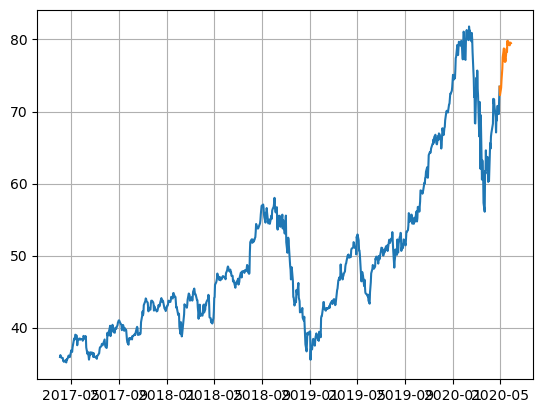

In [32]:
train = df.Close.loc['2017-04-01':'2020-04-30']
test = df.Close.loc['2020-04-30':'2020-05-30']
plt.plot(train)
plt.plot(test)
plt.grid(True)

# Inspect yearly seasonality

<AxesSubplot:>

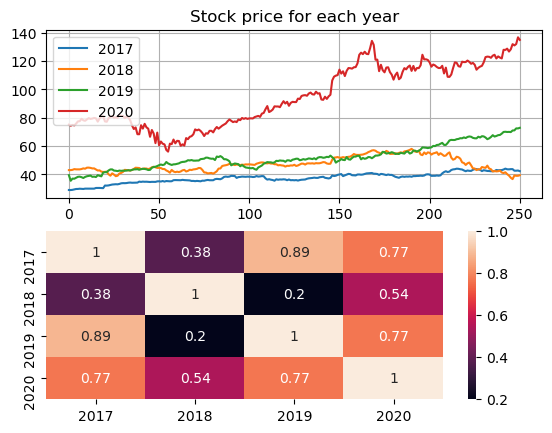

In [5]:
fax = [df_2017.Close,df_2018.Close,df_2019.Close,df_2020.Close]
columns = ['2017','2018','2019','2020']
df_yearly= pd.DataFrame(columns = columns)
for c in range(4):
    df_yearly[columns[c]] = fax[c]
    
plt.subplot(2,1,1)
plt.plot(df_yearly)
plt.title('Stock price for each year')
plt.legend(columns)
plt.grid(True)

plt.subplot(2,1,2)
sns.heatmap(df_yearly.corr(), annot=True)

In [144]:
month_year = pd.DataFrame(df['Close'])
month_year.loc[:,'year'] = month_year.index.year
month_year.loc[:,'month'] = month_year.index.month
month_year = month_year.groupby(['year','month']).mean().unstack()
month_year.columns = month_year.columns.droplevel(0)
#month_year.drop(2020,inplace=True)
month_year

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2017,29.892500,33.428552,35.154457,35.721710,38.056932,36.957840,37.074875,39.755327,39.402125,39.454318,43.101548,42.972875
2018,43.501309,41.909737,43.624048,42.458572,46.384204,47.155357,47.577857,53.336522,55.518421,55.211413,47.808929,41.066579
2019,38.541548,42.931973,45.823453,50.129048,47.818409,48.242250,51.304091,51.239432,54.498750,58.821630,65.630126,69.131428
2020,77.979048,77.817631,65.611023,68.096547,77.496376,86.451590,95.566250,117.299762,115.125237,116.413182,116.825999,127.290455


# Plot for monthly seasonality

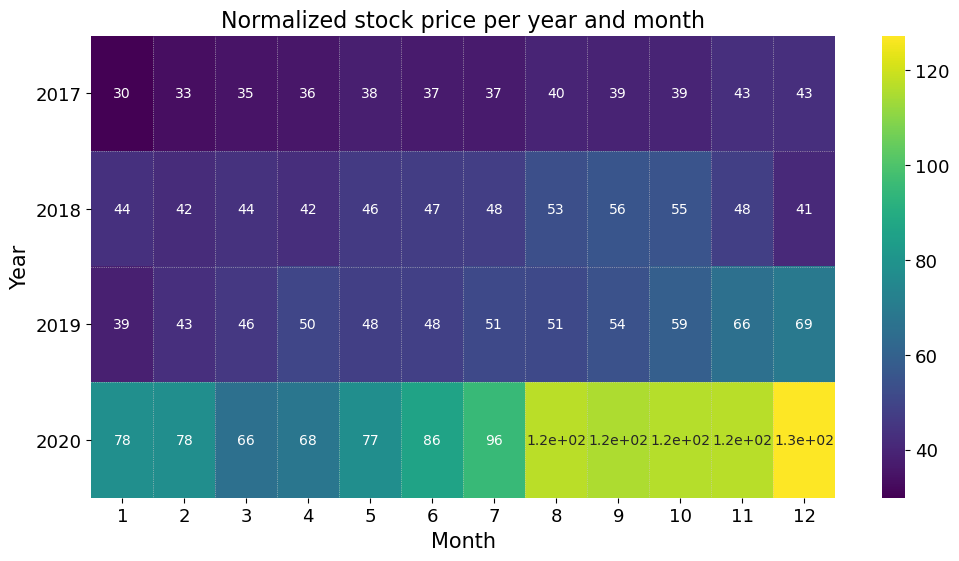

In [146]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(month_year, ax=ax, cmap=plt.cm.viridis, annot=True)

cbax = f.axes[1]
[l.set_fontsize(13) for l in cbax.yaxis.get_ticklabels()]
#cbax.set_ylabel('Santander cycles hires', fontsize=13)

[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)];

ax.set_title('Normalized stock price per year and month', fontsize=16)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Year', fontsize=15)
ax.set_yticklabels(np.arange(2017, 2021, 1), rotation=0);

# FIND DAILY SEASONALITY

In [147]:
month_day = pd.DataFrame(df['Close'][:'2019-12-30'])
month_day.loc[:,'month'] = month_day.index.month
month_day.loc[:,'day'] = month_day.index.dayofweek
month_day = month_day.groupby(['day','month']).mean().unstack()
month_day.columns = month_day.columns.droplevel(0)
month_day

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
0,37.062222,39.266388,41.645834,43.126786,43.687750,43.829792,45.213500,47.902917,50.112000,50.824821,52.118750,52.466923
1,37.056607,39.753750,41.502708,43.382116,43.525715,44.040833,46.604808,47.432885,49.754792,51.314666,51.859375,52.055682
2,38.040178,39.600624,40.939808,42.957917,44.152333,44.207708,45.835625,47.847500,49.899375,51.724464,51.228077,49.641000
3,37.447116,39.316667,41.257857,42.889167,44.531071,43.760769,44.735227,48.286667,49.956667,51.568654,51.652047,51.109374
4,37.418541,39.140417,41.381429,42.514500,44.442500,43.882143,45.261875,48.768036,48.955193,51.246042,52.846250,50.281922


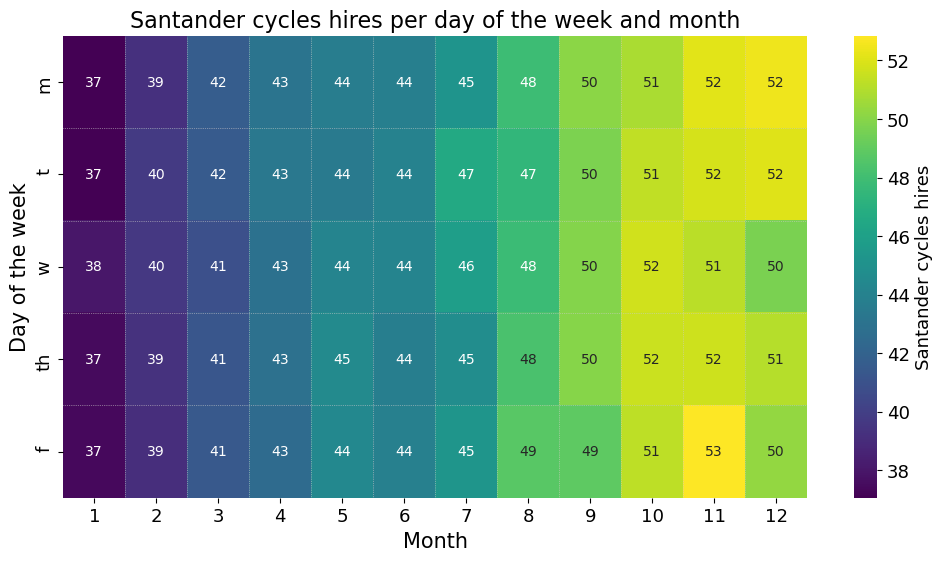

In [148]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(month_day, ax = ax, cmap=plt.cm.viridis, annot=True)

cbax = f.axes[1]
[l.set_fontsize(13) for l in cbax.yaxis.get_ticklabels()]
cbax.set_ylabel('Santander cycles hires', fontsize=13)

[ax.axhline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 7)]
[ax.axvline(x, ls=':', lw=0.5, color='0.8') for x in np.arange(1, 24)];

ax.set_title('Santander cycles hires per day of the week and month', fontsize=16)

[l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]
[l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Day of the week', fontsize=15)
day_abbr = ['m','t','w','th','f','s','su']
ax.set_yticklabels(day_abbr[0:5]);
plt.show()

In [11]:
#Resampling funciton provided in the lab

def _resample(df):

    # Upsample in order to have data for every minute.
    df_res = df.resample('1T')

    # Interpolate through time
    df_res = df_res.interpolate(method='time')

    # Downsample to a 1-hour basis (60 minutes).
    df_res = df_res.resample('1D')

    df_res = df_res.interpolate()

    # We can remove all empty rows or leave like this for missing values analysis?
    #df_res = df_res.dropna(how='all')

    return df_res

# Normalizing data to make plotting easier

Plotting Covid cases with Apple & SP500 stock price as well as the reported Revenue for each quarter. Revenue was later removed in favour of Earnings per share difference (expected vs actual) 

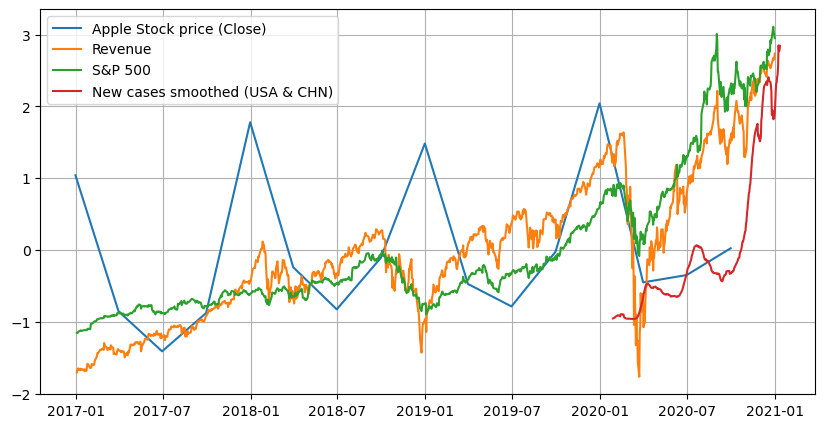

In [55]:
from sklearn.preprocessing import StandardScaler

america = covid[covid['iso_code'] == 'USA'].new_cases_smoothed
china = covid[covid['iso_code'] == 'CHN'].new_cases_smoothed
df_new = pd.DataFrame(columns=['USA', 'CHN'])
df_new['USA'] = america
df_new['CHN'] = china
df_new['total'] = america + china

index = np.array(df.index).reshape(-1,1)
revenue = np.array(df2.Revenue.astype(int)).reshape(-1,1)
apple = np.array(df.Close).reshape(-1,1)
sp = np.array(df_SP.Close).reshape(-1,1)
cv = np.array(df_new.total).reshape(-1,1)

scaler = StandardScaler()
df2_scaled = scaler.fit_transform(revenue)
dfSP_scaled = scaler.fit_transform(apple)
df_scaled = scaler.fit_transform(sp)
covid_scaled = scaler.fit_transform(cv)

plt.figure(figsize=(10,5))
plt.plot(df2.index,df2_scaled)
plt.plot(index,df_scaled)
plt.plot(index,dfSP_scaled)
plt.plot(df_new.index,covid_scaled)
plt.legend(['Apple Stock price (Close)','Revenue', 'S&P 500', 'New cases smoothed (USA & CHN)'])
plt.grid(True)

# Load more stock datasets

In [91]:
#test_date = ['2020-04-30':'2020-05-30']
#train_date = ['2017-04-01':'2020-04-30']

sp500 = pd.read_csv('^GSPC.csv',parse_dates = ['Date'], index_col='Date').loc['2017-04-01':'2020-05-31']
apple = pd.read_csv('AAPL.csv',parse_dates = ['Date'], index_col='Date').loc['2017-04-01':'2020-05-31']
microsoft = pd.read_csv('MSFT.csv',parse_dates = ['Date'], index_col='Date').loc['2017-04-01':'2020-05-31']
google =  pd.read_csv('GOOG.csv',parse_dates = ['Date'], index_col='Date').loc['2017-04-01':'2020-05-31']
amzn =  pd.read_csv('AMZN.csv',parse_dates = ['Date'], index_col='Date').loc['2017-04-01':'2020-05-31']

In [92]:
big = pd.concat([sp500,apple,microsoft, google, amzn], keys = ['sp500','apple','mic', 'google', 'amzn'])

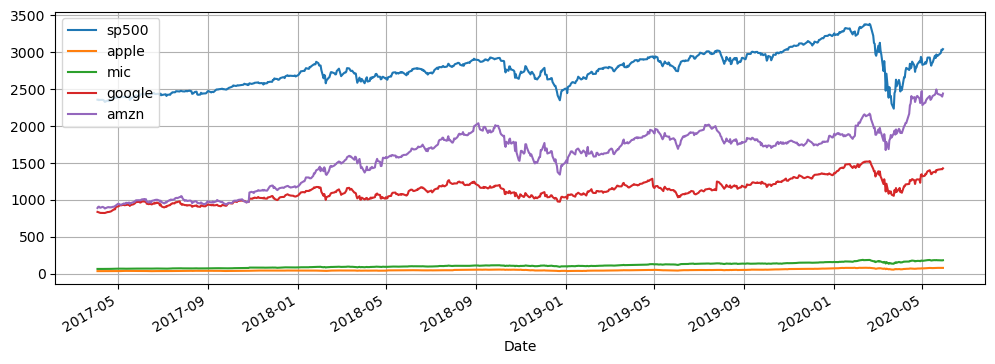

In [93]:
name = ['sp500','apple','mic', 'google','amzn']
for tick in name:
    big.loc[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.grid(True)
plt.legend()

# Normalized stock prices rolling average plot

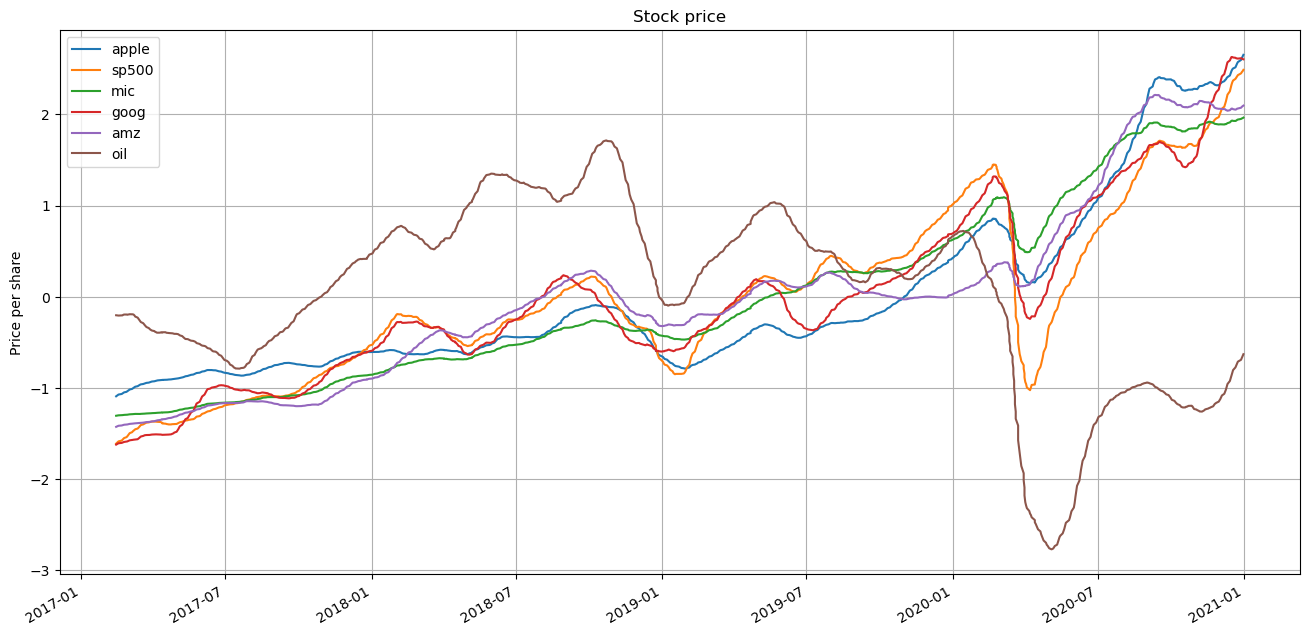

In [133]:
dfm = pd.read_csv('complete_mean_30.csv', parse_dates=True, index_col='Unnamed: 0')
dfm.columns = ['apple', 'sp500', 'mic', 'goog', 'amz', 'volume', 'oil',
       'covid', 'dif', 'event']

dfm[['apple', 'sp500', 'mic', 'goog', 'amz','oil']].plot(figsize=(16,8))
plt.ylabel('Price per share')
plt.title('Stock price')
plt.grid(True)

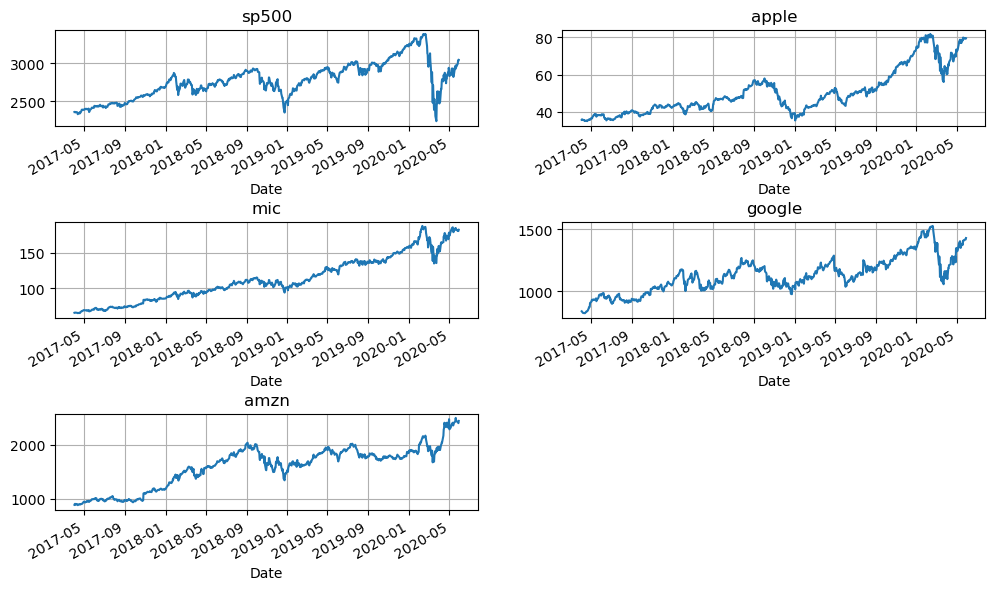

In [94]:
plt.subplots_adjust(bottom=0.7,top=1,wspace = 0.2,hspace = 1)
for i in range(1,6):
    
    plt.subplot(3,2,i)
    big.loc[name[i-1]]['Close'].plot(figsize=(12,6))
    plt.title(name[i-1])
    plt.grid(True)

#  Daily Percentage Change

In [95]:
returns = pd.DataFrame()
for tick in name:
    returns[tick + ' Return'] = big.loc[tick]['Close'].pct_change(periods=1)

In [117]:
returns.describe().loc['std']

sp500 Return     0.013538
apple Return     0.019630
mic Return       0.018643
google Return    0.017952
amzn Return      0.019276
Name: std, dtype: float64

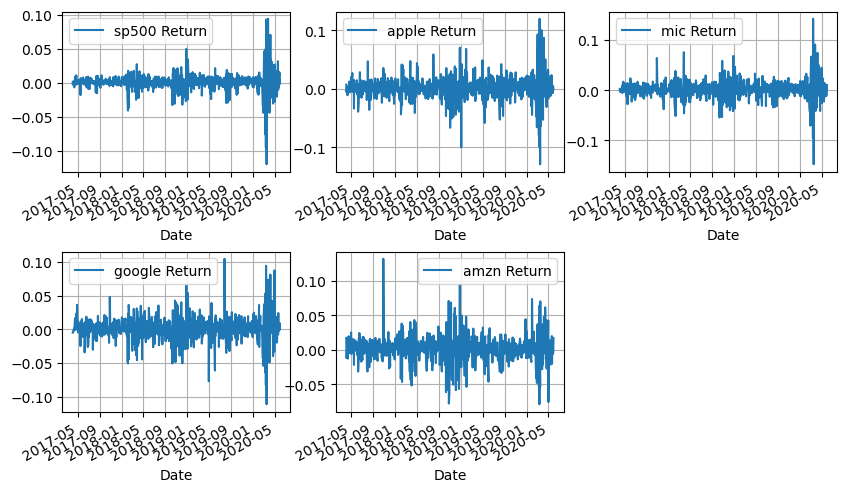

In [98]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(bottom=0.1,top=1,wspace = 0.2,hspace = 0.5)
for i in range(5):
    plt.subplot(2,3,i+1)
    returns[returns.columns[i]].plot(legend=True)
    plt.grid(True)

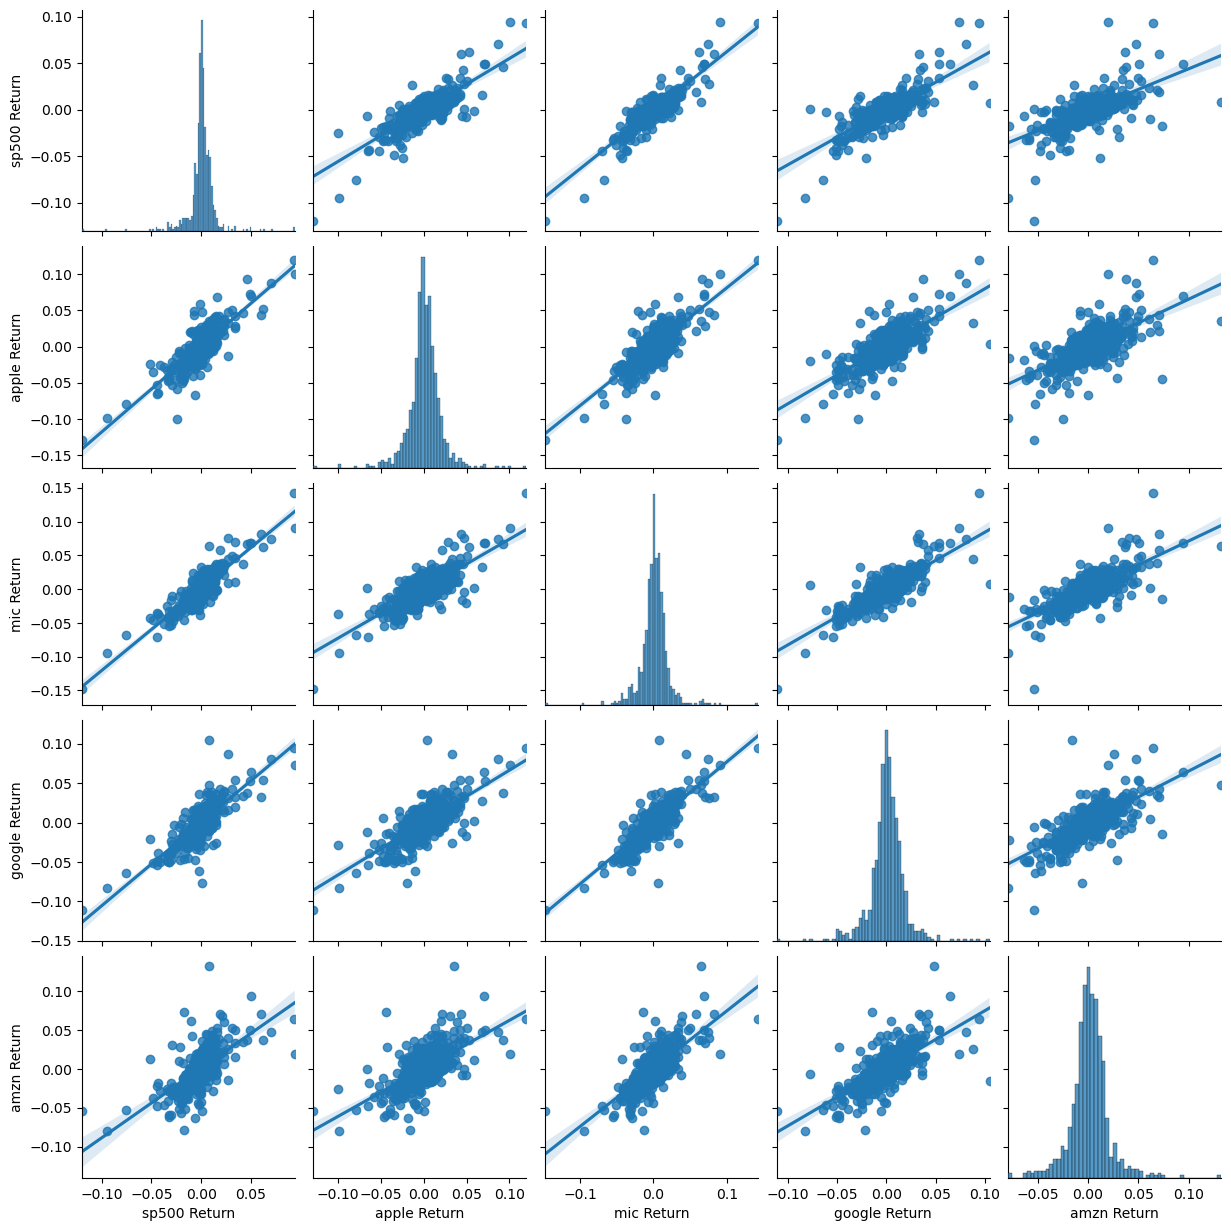

In [87]:
sns.pairplot(returns[1:], kind='reg')

In [75]:
test = pd.DataFrame(columns=name)
for x in name:
    test[x] = big.loc[x]['Close']

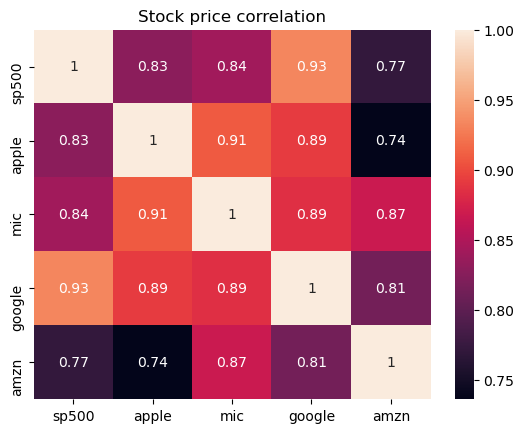

In [76]:
ax = plt.axes()
sns.heatmap(test.corr(), annot=True, ax= ax)
ax.set_title('Stock price correlation')
plt.show()

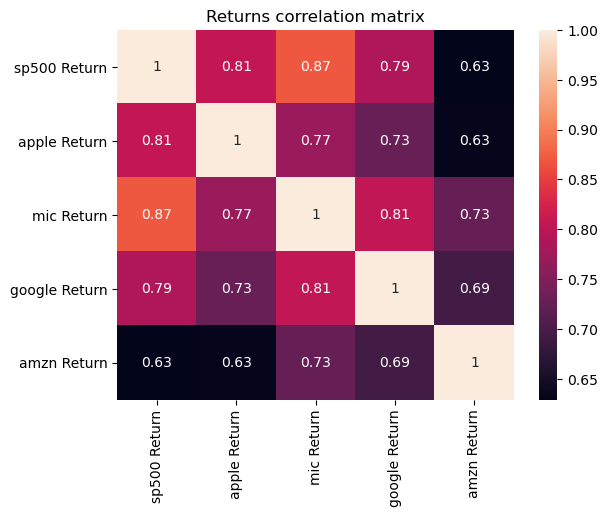

In [116]:
ax = plt.axes()
sns.heatmap(returns[1:].corr(), annot=True)
ax.set_title('Returns correlation matrix')
plt.show()

# Candle Plot

In [78]:
big.loc['apple'].iplot(kind='candle')

# Bollinger Plot

In [79]:
big.loc['apple']['Close'].ta_plot(study='boll', periods=15)

# Apple Returns (Daily, Weekly, Monthly, Yearly) % change

daily   	Mean=0.0017, 	 Std=0.0200
weekly  	Mean=0.0117, 	 Std=0.0474
monthly 	Mean=0.0496, 	 Std=0.1086
yearly  	Mean=0.5532, 	 Std=0.4799


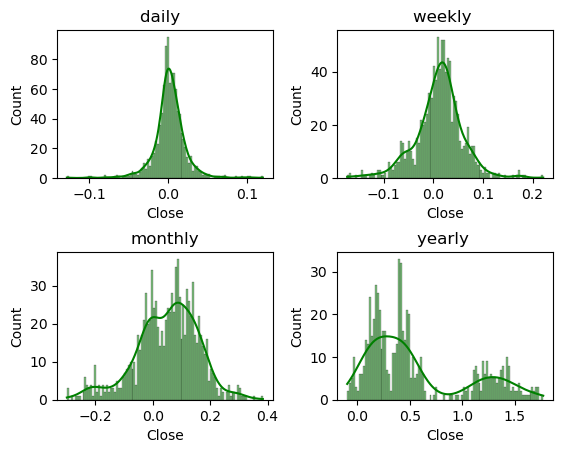

In [80]:
period = [1,7,30,350]
title = ['daily  ','weekly ', 'monthly', 'yearly ']

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.histplot(df['Close'].pct_change(periods=period[i]),color='green',bins=100, kde=True)
    plt.title(title[i])
    print('{} \tMean={:.4f}, \t Std={:.4f}'.format(title[i],
                                                    df['Close'].pct_change(periods=period[i]).mean(),
                                                    df['Close'].pct_change(periods=period[i]).std()))
plt.subplots_adjust(wspace = 0.3,hspace = 0.5)

# Apple returns box plots

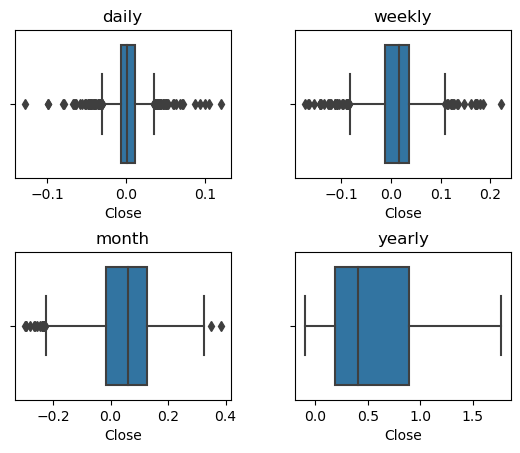

In [122]:
period = [1,7,30,350]
title = ['daily','weekly', 'month', 'yearly']

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df['Close'].pct_change(periods=period[i]))
    plt.title(title[i])
plt.subplots_adjust(wspace = 0.3,hspace = 0.5)

# Close-Open difference per day of the week

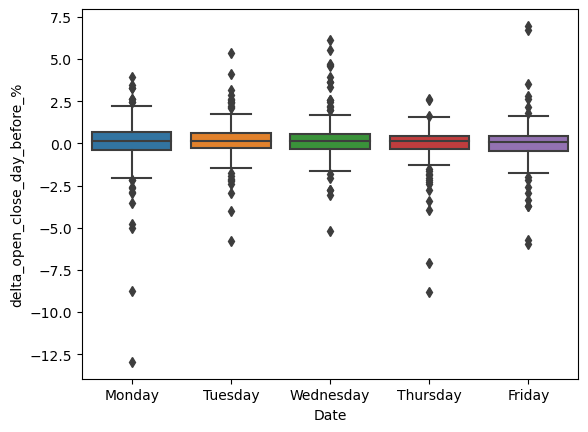

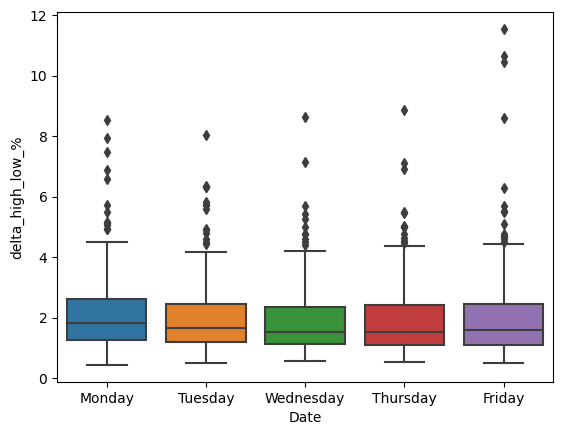

In [118]:
df = pd.read_csv('AAPL.csv', parse_dates = ['Date'])
df['delta_open_close_day_before_%']=((df['Open']-df['Close'].shift(1))/df['Close'].shift(1))*100
df['delta_high_low_%']=((df['High']-df['Low'])/df['Low'])*100

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

sns.boxplot(x=df.Date.dt.day_name(), y=df['delta_open_close_day_before_%'], order=order);
plt.show()
sns.boxplot(x=df.Date.dt.day_name(), y=df['delta_high_low_%'], order=order);

# Further seasonality check

In [111]:
apple['year'] = apple.index.year
apple['month'] = apple.index.month
apple['day'] = apple.index.day

Text(0.5, 1.0, 'Average Apple stock price per month 2017-2020')

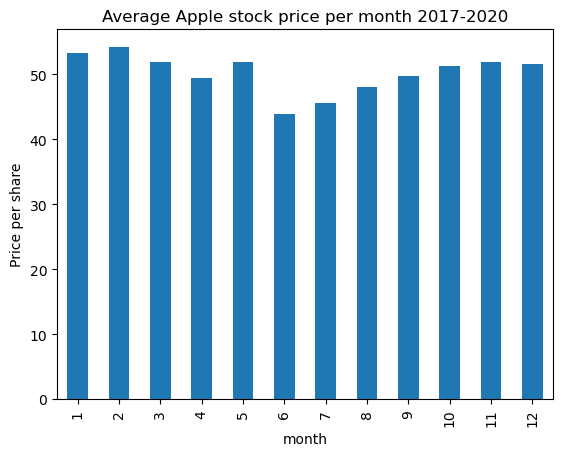

In [115]:
apple.groupby('month')['Close'].mean().plot.bar()
plt.ylabel('Price per share')
plt.title('Average Apple stock price per month 2017-2020')